<a href="https://colab.research.google.com/github/Akinlaso-codes/apply_datat_sci_lab/blob/main/Heart_Disease_prediction_DSN_2024_AI_Bootcamp_Qualification_Hackathon_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import ipywidgets as widgets
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from ipywidgets import interact
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    log_loss,
    accuracy_score,
    precision_score,
    recall_score,

)
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Understand the columns names
var_def = pd.read_csv("/content/Variable Definitions.csv")
var_def

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [4]:
#Load the Train dataset
df = pd.read_csv("/content/Train.csv")
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,30921,49,1,2,105,220,1,1,195,1,1.0,1,2,3,1
1,73128,29,1,0,160,180,0,2,198,0,6.0,2,1,0,1
2,45328,46,1,2,115,131,1,2,125,1,2.3,0,0,0,1
3,67372,41,1,2,161,454,1,2,159,1,3.5,2,4,0,1
4,41642,57,1,3,129,277,0,1,80,0,5.6,0,2,0,0


In [5]:
df.shape

(7087, 15)

In [6]:
#Descriptive statistics
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000,7087.000000
mean,50520.455341,53.161987,0.498660,1.511923,147.749259,343.852265,0.499365,1.011006,136.083251,0.500494,3.126556,0.995485,2.023705,1.496402,0.811486
std,23091.461196,14.217069,0.500033,1.118239,31.019531,127.795534,0.500035,0.816595,38.022627,0.500035,1.784760,0.817175,1.411018,1.118296,0.391150
min,10019.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30629.000000,41.000000,0.000000,1.000000,121.000000,231.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000,1.000000
50%,50872.000000,53.000000,0.000000,2.000000,148.000000,344.000000,0.000000,1.000000,136.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,70511.000000,66.000000,1.000000,3.000000,175.000000,453.000000,1.000000,2.000000,169.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,89991.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Inspect for number of null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7087 non-null   int64  
 1   age       7087 non-null   int64  
 2   sex       7087 non-null   int64  
 3   cp        7087 non-null   int64  
 4   trestbps  7087 non-null   int64  
 5   chol      7087 non-null   int64  
 6   fbs       7087 non-null   int64  
 7   restecg   7087 non-null   int64  
 8   thalach   7087 non-null   int64  
 9   exang     7087 non-null   int64  
 10  oldpeak   7087 non-null   float64
 11  slope     7087 non-null   int64  
 12  ca        7087 non-null   int64  
 13  thal      7087 non-null   int64  
 14  target    7087 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 830.6 KB


In [8]:
#Understand the class balance status
df["target"].value_counts(normalize=True)

,proportion
target,
1,0.811486
0,0.188514


In [9]:
type(df.columns)

pandas.core.indexes.base.Index

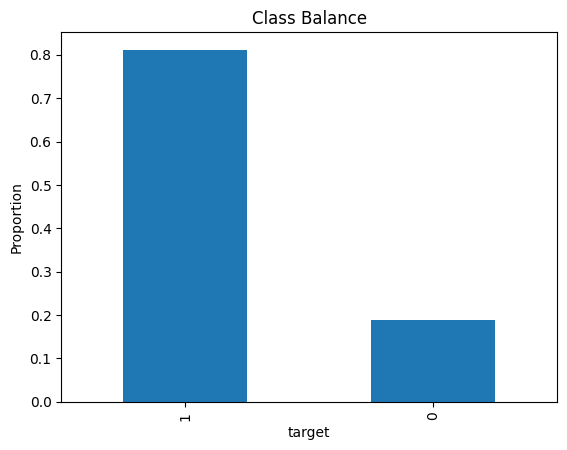

In [10]:
# Plot class balance
df["target"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="target",
    ylabel="Proportion",
    title="Class Balance"
    );

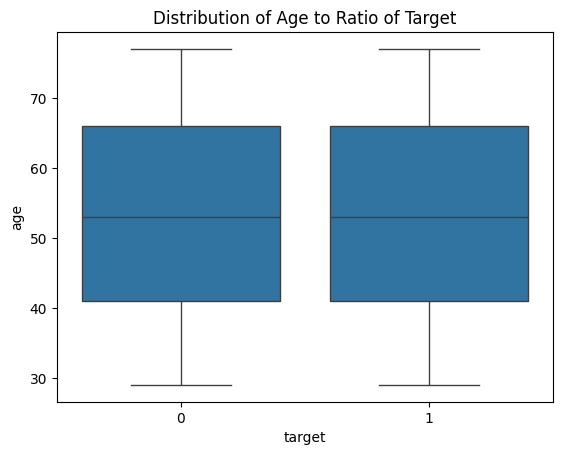

In [11]:
# Create boxplot
sns.boxplot(x="target", y="age", data=df)
plt.xlabel("target")
plt.ylabel("age")
plt.title("Distribution of Age to Ratio of Target");

In [12]:
# Summary statistics for AGE
df["age"].describe().apply("{0:,.0f}".format)

,age
count,"7,087"
mean,53
std,14
min,29
25%,41
50%,53
75%,66
max,77


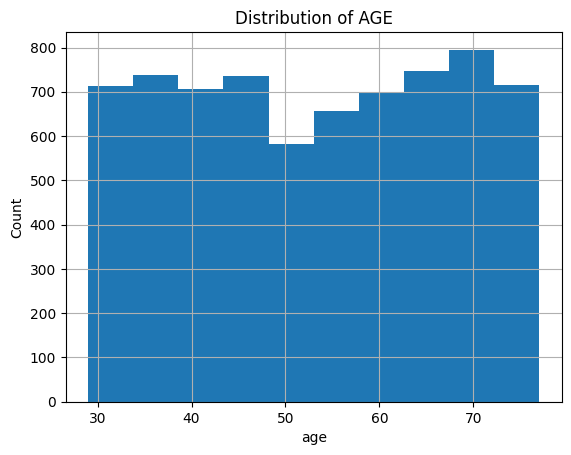

In [13]:
# Plot histogram of age
df["age"].hist()
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Distribution of AGE");

In [14]:
# Correlation
df.corr()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,1.000000,-0.021279,0.002804,0.003040,0.007664,0.013666,0.019204,0.014709,-0.026461,0.003543,-0.016567,0.014747,0.020116,-0.008111,-0.020383
age,-0.021279,1.000000,-0.000327,-0.011697,-0.022024,0.002289,-0.000462,-0.010000,0.007868,-0.004398,-0.003299,0.010218,0.008799,0.007679,0.001990
sex,0.002804,-0.000327,1.000000,-0.010887,0.014904,0.006045,-0.010022,0.002801,0.003109,0.019898,-0.000830,-0.008994,-0.000755,-0.005372,0.021797
cp,0.003040,-0.011697,-0.010887,1.000000,0.014206,-0.003902,-0.016833,-0.001844,0.002954,0.002576,0.004268,-0.002721,-0.008139,-0.012746,-0.193608
trestbps,0.007664,-0.022024,0.014904,0.014206,1.000000,-0.014301,0.009375,0.005268,-0.005648,0.006591,0.014140,-0.003736,0.000349,0.006058,0.012341
chol,0.013666,0.002289,0.006045,-0.003902,-0.014301,1.000000,0.018502,0.001352,-0.012085,0.001228,-0.013285,-0.015671,0.003871,0.014858,-0.000876
fbs,0.019204,-0.000462,-0.010022,-0.016833,0.009375,0.018502,1.000000,0.001400,0.013942,0.005504,0.011563,0.008627,-0.003779,-0.002717,0.005160
restecg,0.014709,-0.010000,0.002801,-0.001844,0.005268,0.001352,0.001400,1.000000,-0.021578,-0.002087,0.001542,0.011706,0.014716,-0.004902,0.004288
thalach,-0.026461,0.007868,0.003109,0.002954,-0.005648,-0.012085,0.013942,-0.021578,1.000000,0.021033,-0.003179,-0.012914,0.013652,0.001378,0.006426
exang,0.003543,-0.004398,0.019898,0.002576,0.006591,0.001228,0.005504,-0.002087,0.021033,1.000000,0.014929,-0.000340,0.005784,0.018994,0.482459


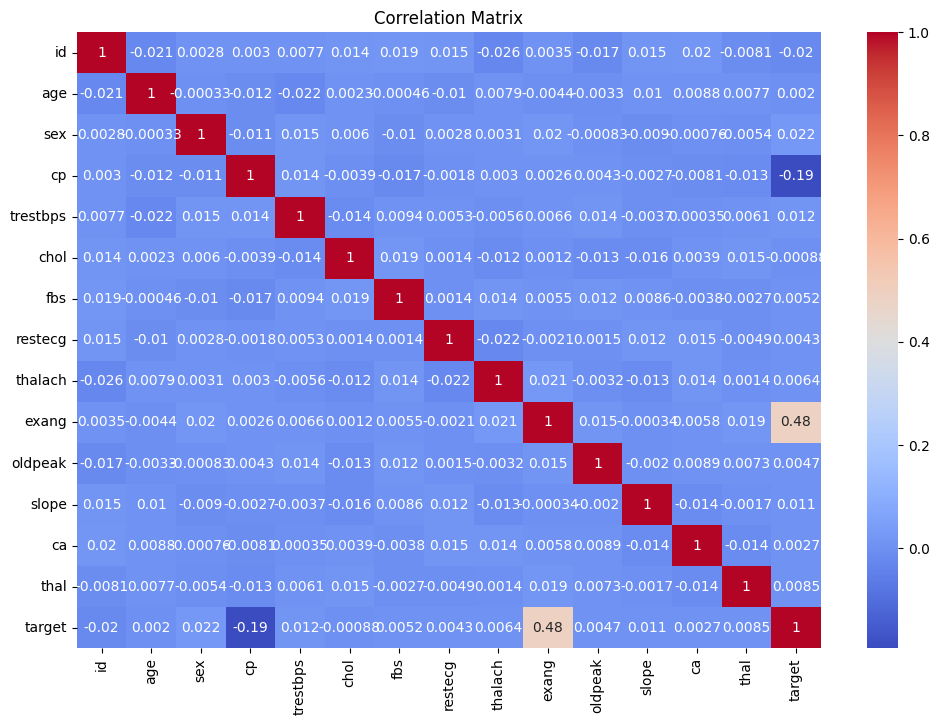

In [15]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

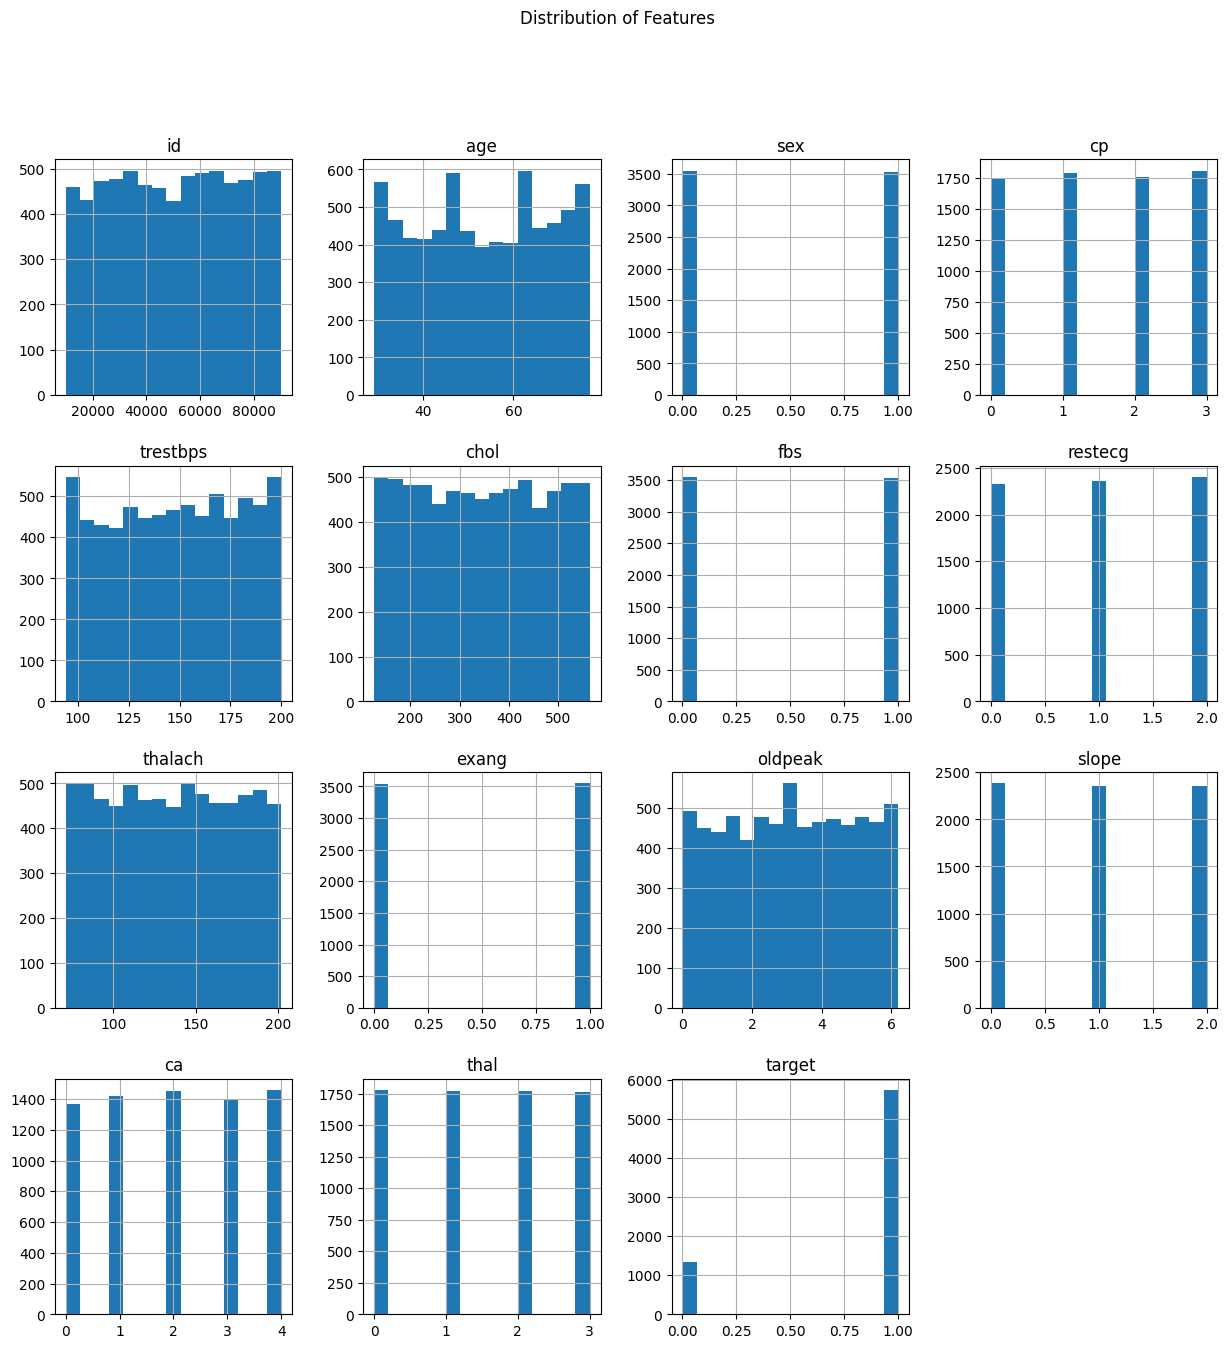

In [16]:
# Plot histograms for features
df.hist(figsize=(15, 15), bins=15);
plt.suptitle('Distribution of Features')
plt.show()

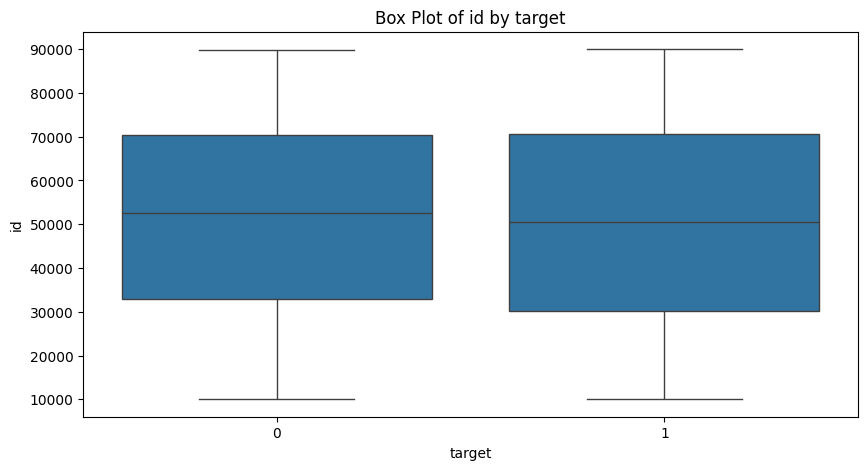

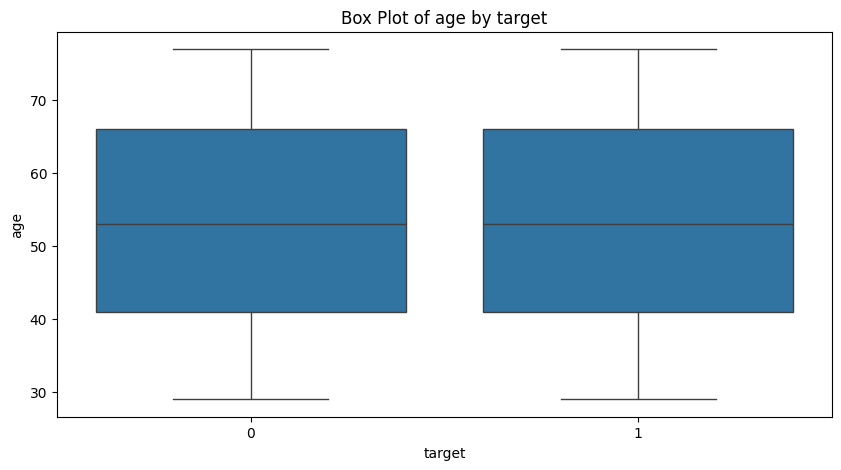

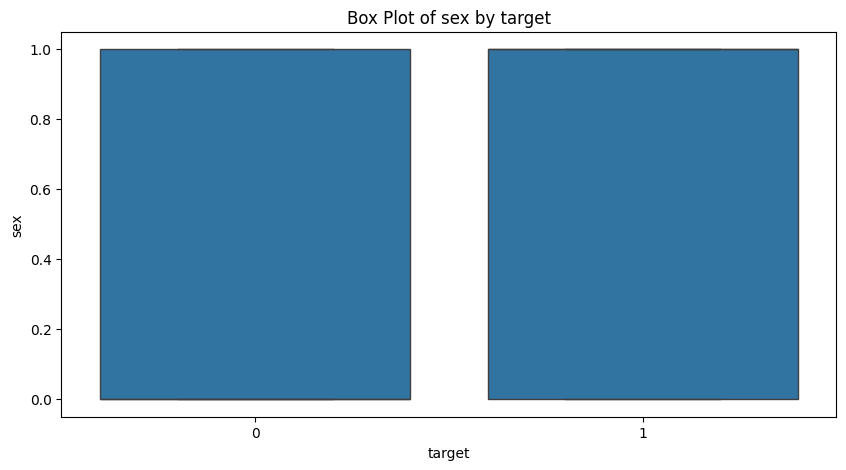

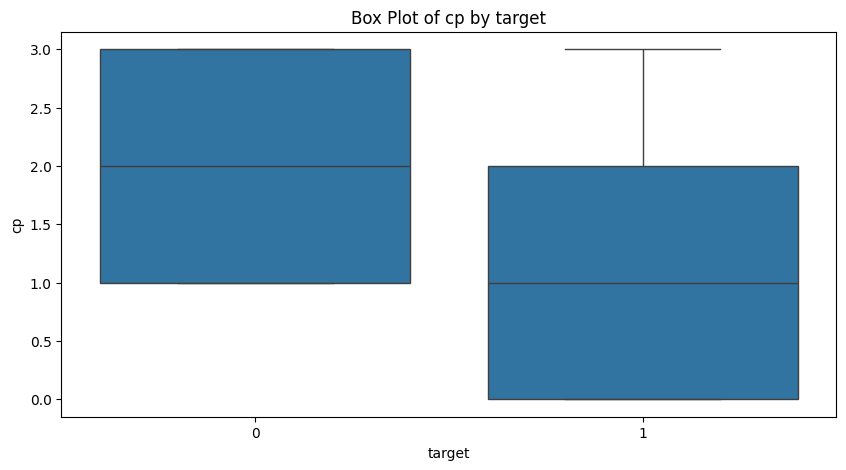

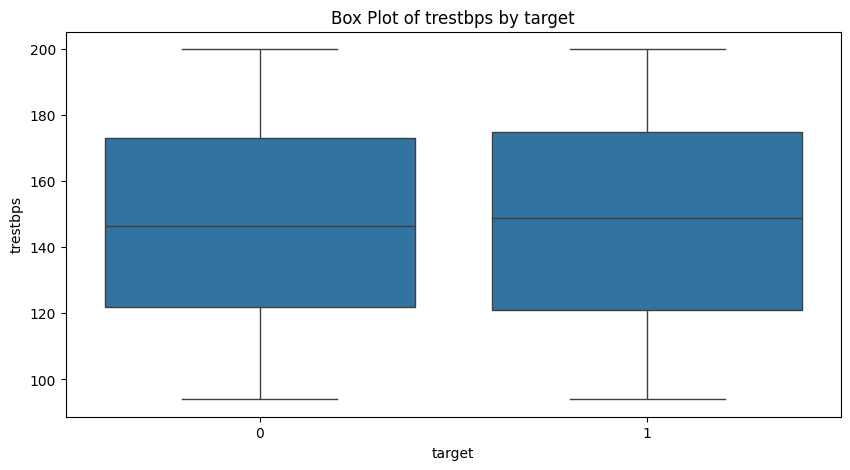

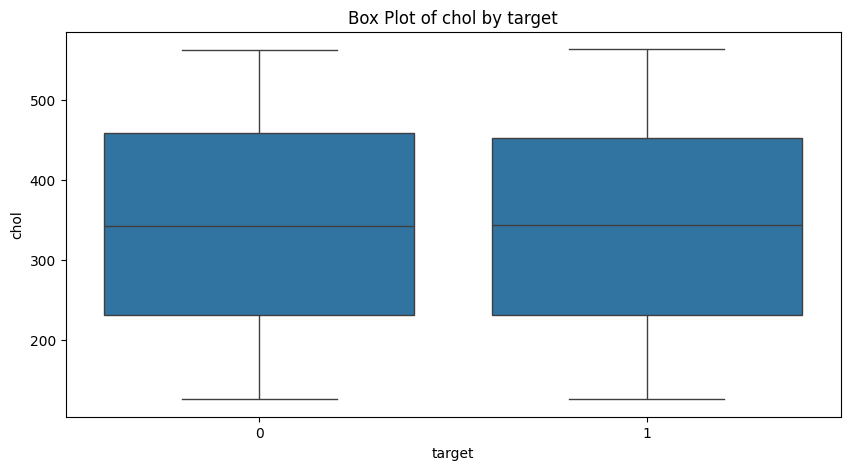

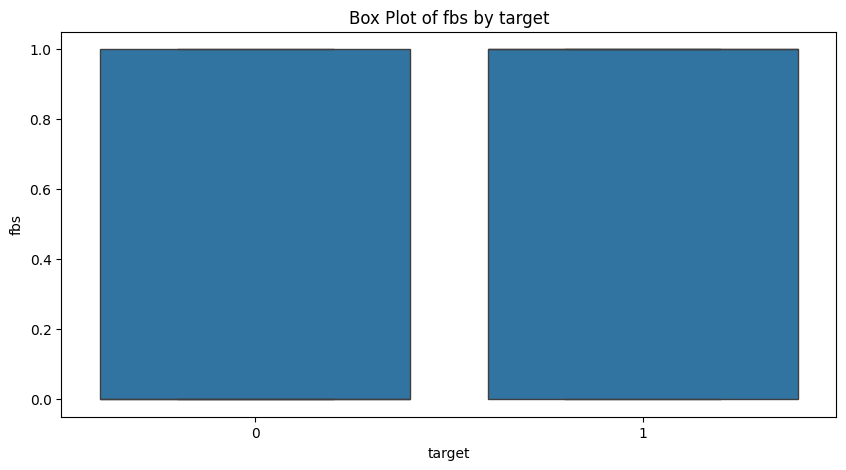

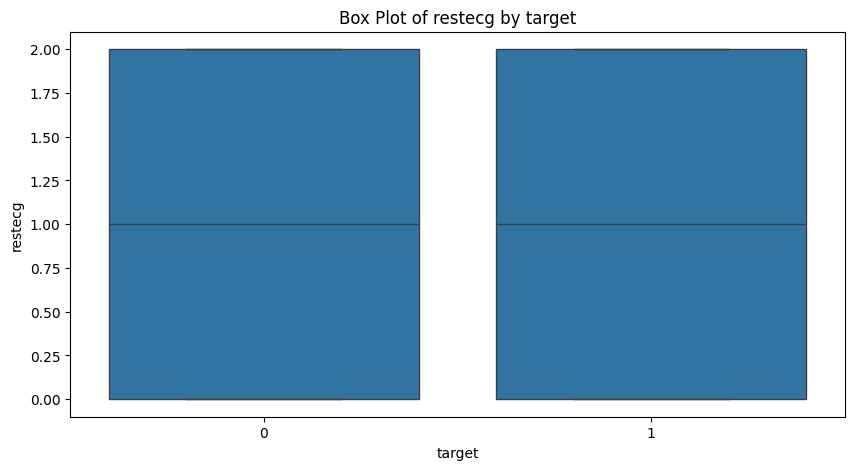

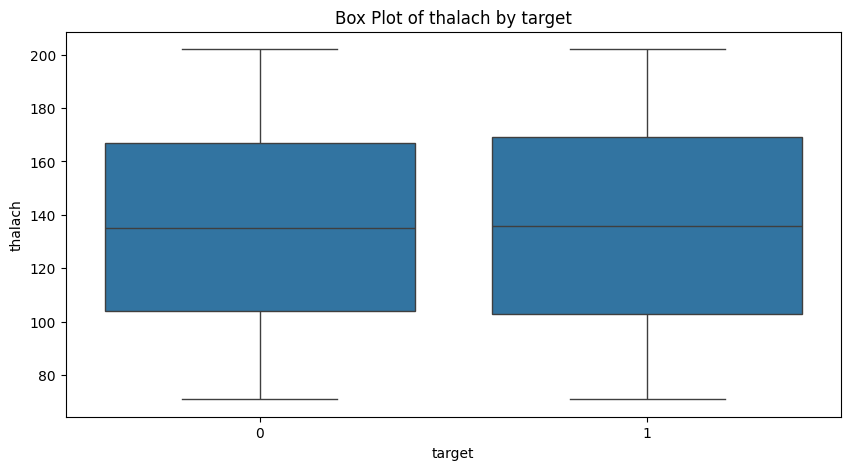

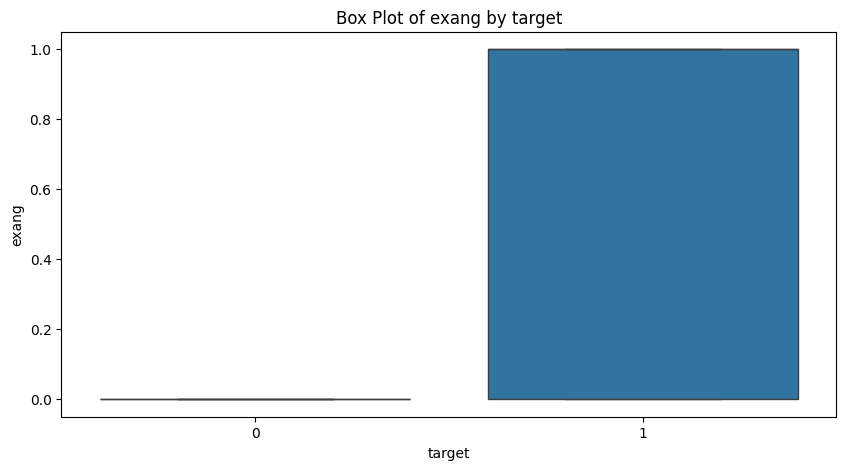

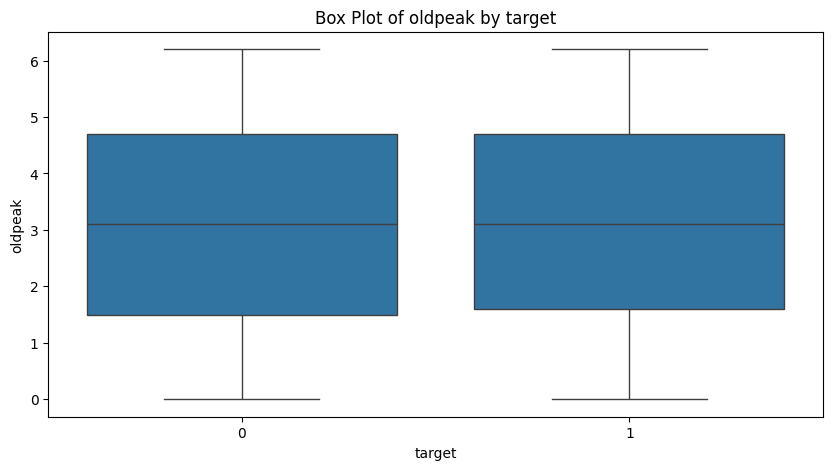

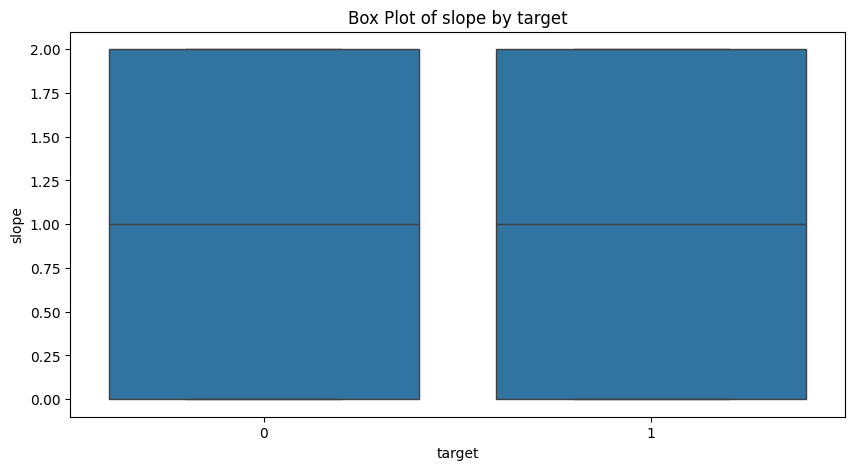

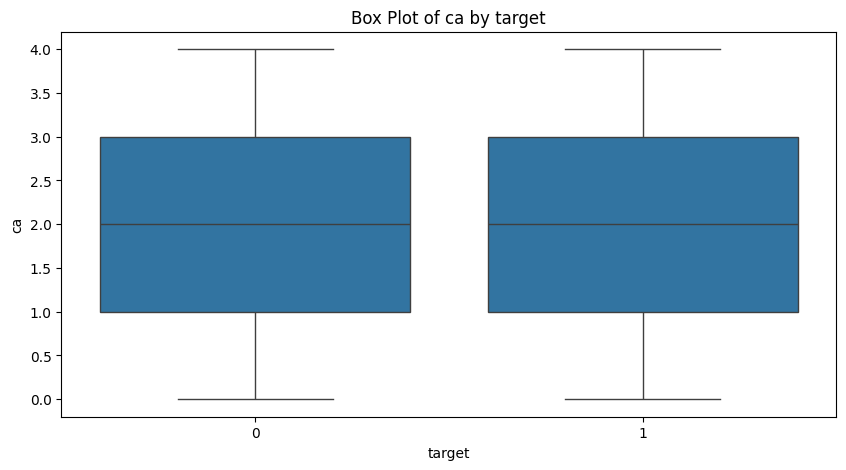

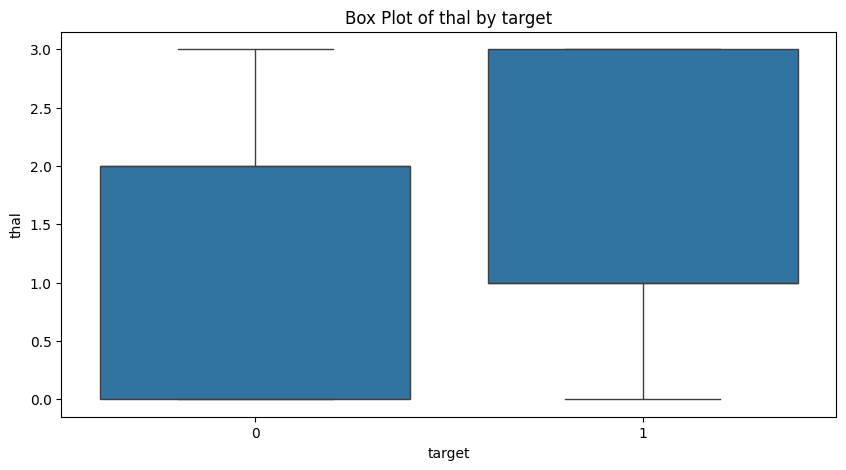

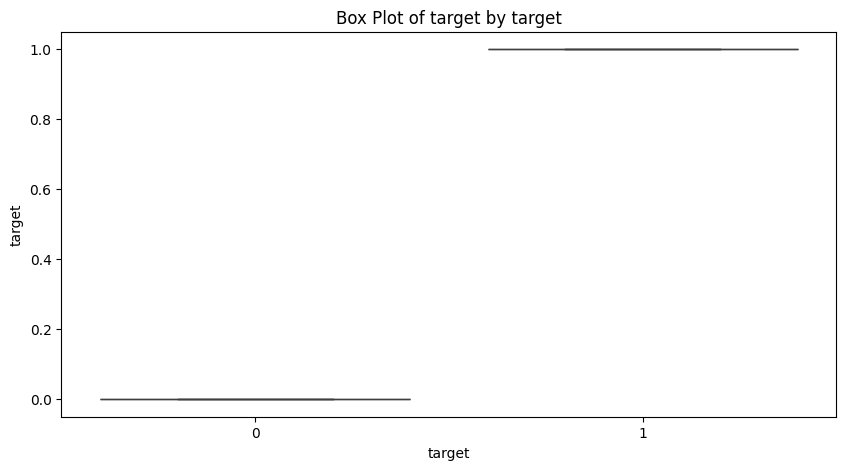

In [17]:
# Plot box plots for features
features = df.columns
for col in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Box Plot of {col} by target')
    plt.show();

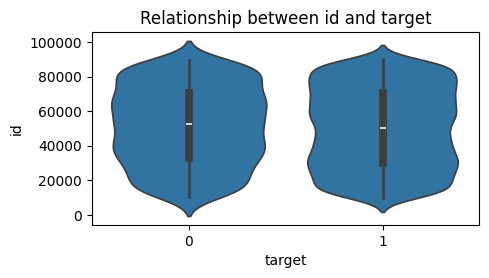

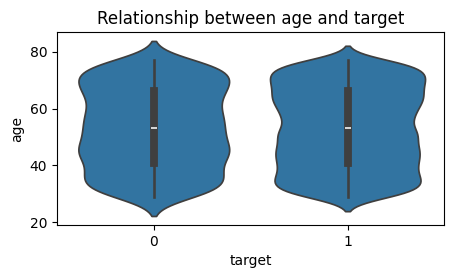

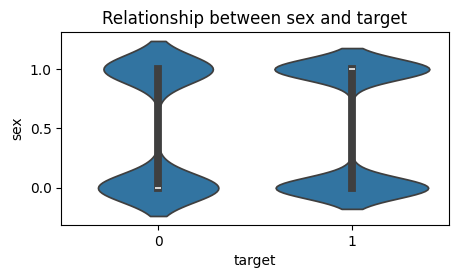

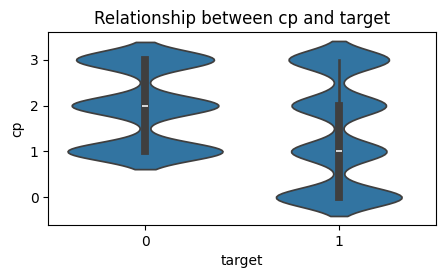

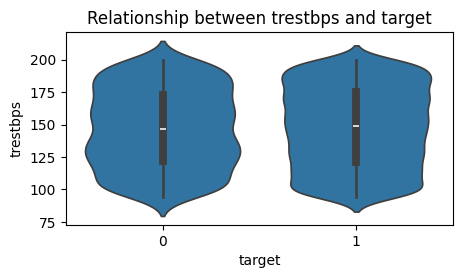

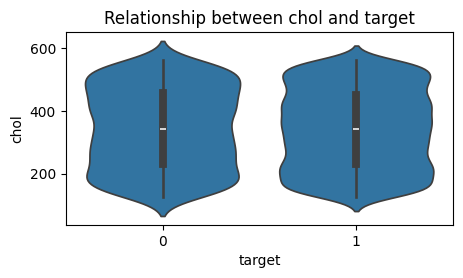

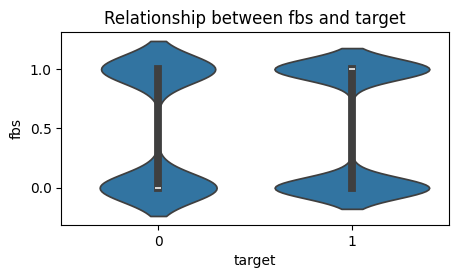

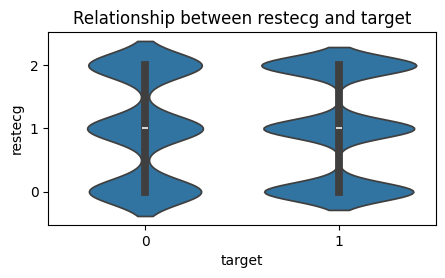

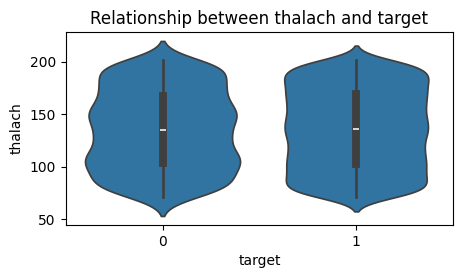

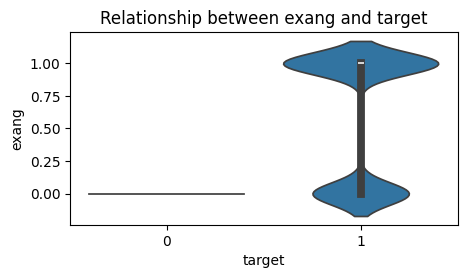

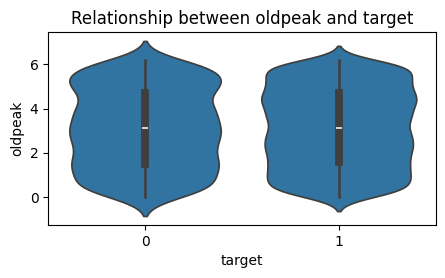

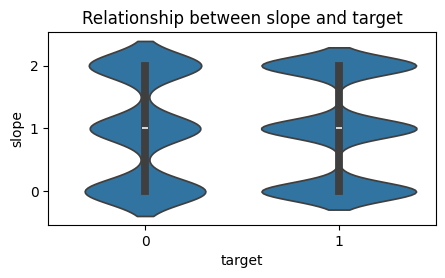

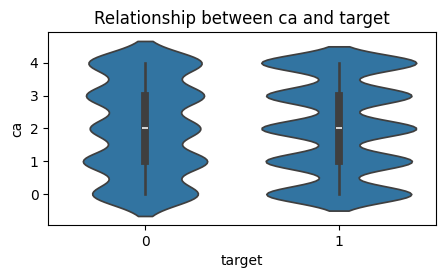

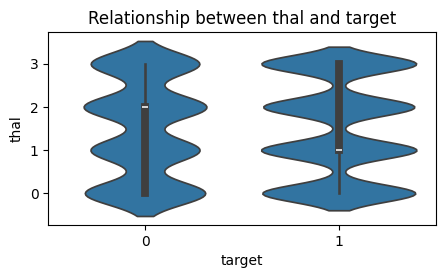

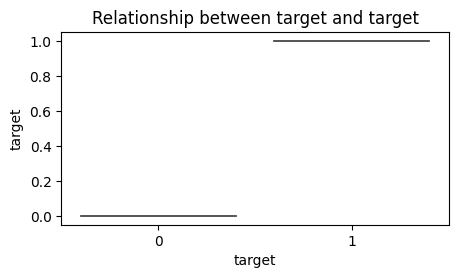

In [18]:
# Plot the relationship between features and the target variable
for col in features:
    plt.figure(figsize=(5, 2.5))
    sns.violinplot(x='target', y=col, data=df)
    plt.title(f'Relationship between {col} and target')
    plt.show()

In [19]:
# Correlation of features with the target variable 'AGE'
df.corr()['age'].sort_values(ascending=False)

,age
age,1.000000
slope,0.010218
ca,0.008799
thalach,0.007868
thal,0.007679
chol,0.002289
target,0.001990
sex,-0.000327
fbs,-0.000462
oldpeak,-0.003299


In [20]:
# View exang column with moderate correlation to target
df[['exang','target']]

,exang,target
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
7082,0,1
7083,0,1
7084,1,1
7085,0,1


In [21]:
# View cp column with negative correlation to target
df[['cp','target']]

,cp,target
0,2,1
1,0,1
2,2,1
3,2,1
4,3,0
...,...,...
7082,1,1
7083,2,1
7084,0,1
7085,1,1


In [22]:
# Percentage of Missing values
df.isnull().sum() / len(df) * 100

,0
id,0.0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0


In [23]:
# Number of unique values in each column
df.nunique()

,0
id,6742
age,49
sex,2
cp,4
trestbps,107
chol,439
fbs,2
restecg,3
thalach,132
exang,2


In [24]:
# Drop high cardinality
df.drop(columns=['id'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7087 entries, 0 to 7086
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7087 non-null   int64  
 1   sex       7087 non-null   int64  
 2   cp        7087 non-null   int64  
 3   trestbps  7087 non-null   int64  
 4   chol      7087 non-null   int64  
 5   fbs       7087 non-null   int64  
 6   restecg   7087 non-null   int64  
 7   thalach   7087 non-null   int64  
 8   exang     7087 non-null   int64  
 9   oldpeak   7087 non-null   float64
 10  slope     7087 non-null   int64  
 11  ca        7087 non-null   int64  
 12  thal      7087 non-null   int64  
 13  target    7087 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 775.3 KB


In [26]:
# Vertical split

target = "target"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7087, 13)
y shape: (7087,)


In [27]:
acc_baseline = y.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.8115


In [28]:
df["target"].unique()

array([1, 0])

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [30]:
scaler = preprocessing.MinMaxScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [39]:
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(2, 16, 2)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(2, 16, 2)}

In [40]:
clf = RandomForestClassifier(random_state=42)

In [41]:
cv_acc_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(), n_jobs=-1)
print(cv_acc_scores)

[0.80112835 0.81664316 0.8094566  0.79534227 0.8052223 ]


In [42]:
model = GridSearchCV(
    clf, # classifier instantiated above
    param_grid=params, # passing defined parameters in dictionary above
    cv=StratifiedKFold(), # no. of cross_validation folds
    n_jobs=-1, # to allow model to function simultaneously
    verbose=1
)
model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 16, 2),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [43]:
model.fit(X, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 16, 2),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [44]:
df1 = pd.read_csv("/content/Test_Dataset.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   chol      2697 non-null   int64  
 6   fbs       2697 non-null   int64  
 7   restecg   2697 non-null   int64  
 8   thalach   2697 non-null   int64  
 9   exang     2697 non-null   int64  
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   int64  
 12  ca        2697 non-null   int64  
 13  thal      2697 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 295.1 KB


In [45]:
pred = df1[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
             "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]

In [46]:
predictions = model.predict(pred)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
sample_sub = pd.read_csv("/content/Sample_Submission.csv")

In [48]:
pred_submission = sample_sub.copy()
pred_submission['target'] = predictions
pred_submission.to_csv('predictions_submission_new_dataset_RandomForest_heart_diesease.csv', index=False)

# Display the first few rows of the submission file
pred_submission.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1


In [49]:
model.best_params_

{'max_depth': 8, 'n_estimators': 25}

In [50]:
 #Save model
import pickle
with open("final-model.pkl", "wb") as f:
    pickle.dump(model, f)

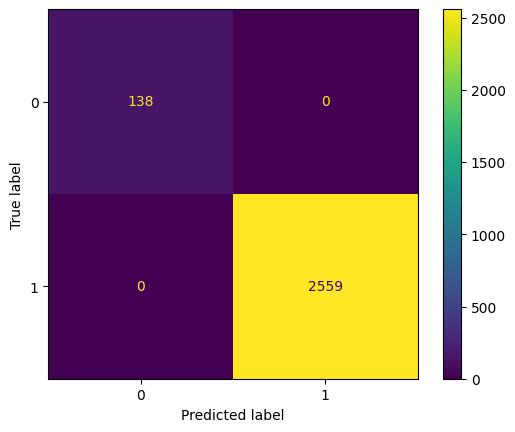

In [53]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, pred, predictions);

In [54]:
# Print classification report
print(classification_report(predictions, model.predict(pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00      2559

    accuracy                           1.00      2697
   macro avg       1.00      1.00      1.00      2697
weighted avg       1.00      1.00      1.00      2697



In [55]:
importances = model.best_estimator_.feature_importances_
importances

array([0.02530409, 0.00419528, 0.25229375, 0.03420289, 0.03281197,
       0.00356548, 0.00491414, 0.02851484, 0.56322615, 0.02677071,
       0.00539563, 0.01064196, 0.00816312])

In [56]:
feat_imp = pd.Series(importances, index=X.columns).sort_values()
feat_imp.head()

,0
fbs,0.003565
sex,0.004195
restecg,0.004914
slope,0.005396
thal,0.008163


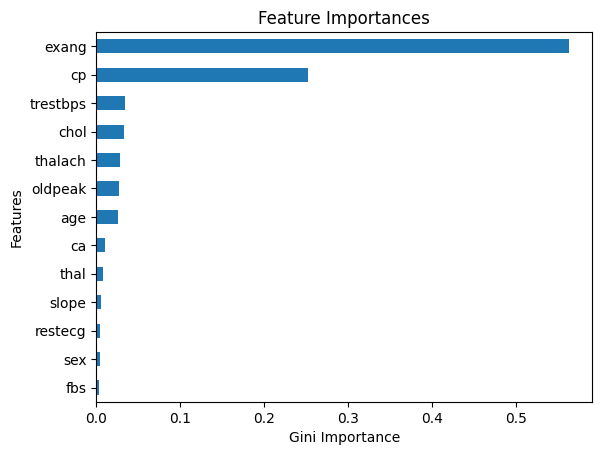

In [57]:
# Get feature names from training data
features = X.columns

# Extract importance from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot the feature importances
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importances");